In [16]:
# load the mnist dataset from keras as train and test sets
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# normalize the image scale to [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [17]:
# print the shape of the train and test sets
print('train_images.shape:', train_images.shape)
print('train_labels.shape:', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)

train_images.shape: (60000, 28, 28)
train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28)
test_labels.shape: (10000,)


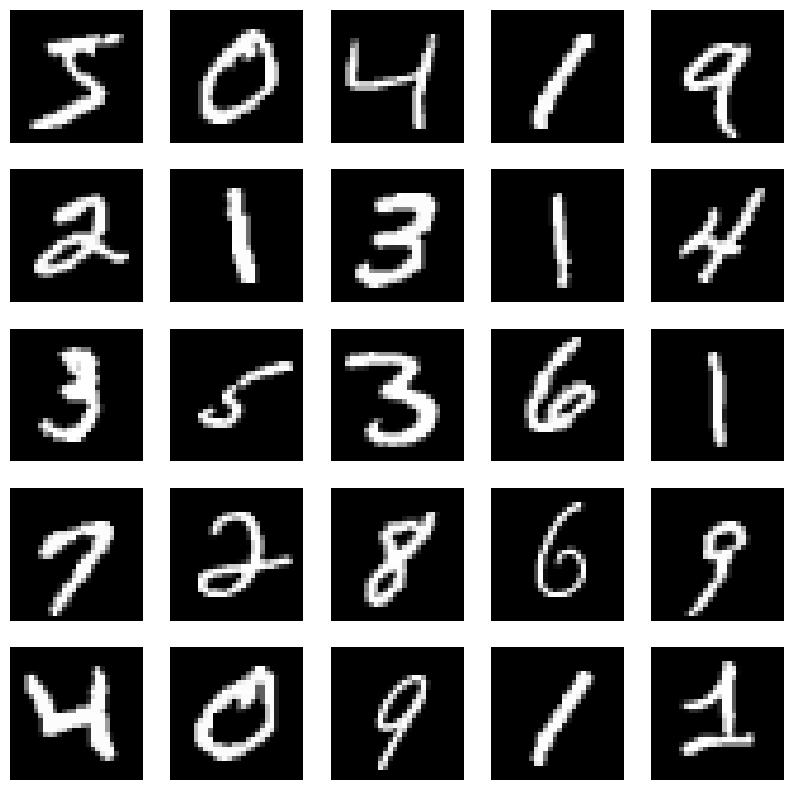

In [18]:
# plot a few training images
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')

In [19]:
# build a model with keras
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

c:\Users\wuyan\Projects\Anaconda\envs\coursera\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# make a prediction with untrained model
predictions = model(train_images[:1]).numpy()
print(predictions)
import tensorflow as tf
print(tf.nn.softmax(predictions).numpy())

# define a cross-entropy loss function taking input from logits, calculate the loss for untrained model
import numpy as np
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss = loss_fn(train_labels[:1], predictions).numpy()
print("Log loss", loss, "vs theoretical ", -np.log(1/10))  # the theo loss for untrained model is -log(1/10) = 2.3

[[0.04706462 0.09452051 0.05524335 0.05443536 0.07552528 0.08026609
  0.16171086 0.10266142 0.08041321 0.24815929]]
[[0.0946778  0.09927914 0.09545532 0.09537822 0.0974111  0.097874
  0.10617895 0.10009065 0.09788841 0.11576639]]
Log loss is 2.3240743 vs theoretical  2.3025850929940455


In [27]:
# compile the model, with loess function, optimizer and metrics specified
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [ ]:
# train the model with 5 epochs
model.fit(train_images, train_labels, epochs=5)

# evaluate the model with test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9798 - loss: 0.0636
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9823 - loss: 0.0581
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9839 - loss: 0.0510
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9843 - loss: 0.0462
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9865 - loss: 0.0405
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.9732 - loss: 0.0908
